In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# load data
outcome = pd.read_csv('outcome_interview.csv')
event = pd.read_csv('event_interview.csv')
fighter = pd.read_csv('fighter_interview.csv')

In [3]:
# check outcome dataframe
outcome.head()

,id,fighter1_id,fighter2_id,winner_id,event_id
0,2264,803,138,138.0,18
1,2272,3025,466,466.0,494
2,2280,3005,1671,1671.0,375
3,2292,2110,284,284.0,352
4,2310,1346,607,1346.0,826


In [4]:
outcome['event_id'].value_counts()

1574    14
27      14
1599    13
1528    13
93      13
122     13
1547    13
440     13
1496    13
1504    13
26      13
1006    13
1506    13
1585    13
107     13
389     13
25      13
155     13
437     13
171     13
1603    13
879     13
477     13
1532    13
832     13
460     13
383     13
524     13
628     13
660     13
        ..
829      1
1352     1
1148     1
864      1
1302     1
664      1
1350     1
1005     1
340      1
1226     1
983      1
1024     1
266      1
1177     1
881      1
420      1
428      1
1130     1
468      1
1396     1
1356     1
1153     1
1409     1
1058     1
1050     1
548      1
978      1
944      1
1324     1
1074     1
Name: event_id, Length: 1398, dtype: int64

In [5]:
outcome[outcome['event_id'] == 1574].sort_values(by='winner_id')

,id,fighter1_id,fighter2_id,winner_id,event_id
2813,4068,2387,257,257.0,1574
3023,4067,828,156,828.0,1574
2954,4075,1589,1689,1689.0,1574
2777,4065,2617,1968,1968.0,1574
2851,4066,2044,110,2044.0,1574
3102,4069,2128,2210,2128.0,1574
2905,4076,2156,994,2156.0,1574
3214,4072,2550,2612,2550.0,1574
3199,4071,528,2594,2594.0,1574
3128,4079,78,2719,2719.0,1574


There can be several fights per event (max=14) between different fighters or just one fight per event.

In [6]:
# check event dataframe
event.head()

,id,name,date,promoter,location,attendance,created_at,modified_at
0,1,One FC 10: Champions and Warriors,2013-09-13,OneFC,NaN,NaN,2019-04-01T19:56:24.477518,2019-04-01T19:56:24.477518
1,2,Legacy FC 45: Todhunter vs. Smith,2015-09-11,Legacy Fc,NaN,NaN,2019-04-01T19:56:28.403410,2019-04-01T19:56:28.403410
2,3,LFA 27: Watley vs. Wilson,2017-11-10,LFA,NaN,NaN,2019-04-01T19:56:32.488043,2019-04-01T19:56:32.488043
3,4,ONE FC 21: Roar of Tigers,2014-10-17,OneFC,NaN,NaN,2019-04-01T19:56:39.395144,2019-04-01T19:56:39.395144
4,5,One FC 8: Kings and Champions,2013-04-05,OneFC,NaN,NaN,2019-04-01T19:56:39.404131,2019-04-01T19:56:39.404131


In [7]:
event[event['id'] == 1574]

,id,name,date,promoter,location,attendance,created_at,modified_at
1193,1574,UFC Fight Night 137: Santos vs. Anders,2018-09-22,UFC,"Sao Paulo, Sao Paulo, Brazil",9485.0,2019-04-01T21:11:09.662166,2019-04-02T17:58:06.269213


`id` column in the `event` dataframe is the same as `event_id` column in the `outcome`dataframe

In [8]:
# check fighter dataframe
fighter.head()

,id,name,nationality
0,111,Bertrand Amoussou,France
1,3227,Dave Zitanick,United States
2,2002,Jim Mullen,United States
3,2033,Mario Neto,Brazil
4,1667,Aaron Lanfranco,United States


`id` column in the `fighter` dataframe is the same as `fighter1_id` and `fighter2_id`columns in the `outcome`dataframe

In [9]:
# rename id column in the event dataframe to event_id
event.rename(columns={'id': 'event_id'}, inplace=True)

In [10]:
event.head(1)

,event_id,name,date,promoter,location,attendance,created_at,modified_at
0,1,One FC 10: Champions and Warriors,2013-09-13,OneFC,NaN,NaN,2019-04-01T19:56:24.477518,2019-04-01T19:56:24.477518


In [11]:
event['event_id'].nunique()

1612

In [12]:
outcome['event_id'].nunique()

1398

There are more unique event_id's in the `event` dataframe than in the `outcome` dataframe; let's merge them on the common event_id's (inner join).

In [13]:
# merge outcome and event dataframes
df = pd.merge(outcome, event, on='event_id')

In [14]:
df.head()

,id,fighter1_id,fighter2_id,winner_id,event_id,name,date,promoter,location,attendance,created_at,modified_at
0,2264,803,138,138.0,18,UFC on FOX 5: Henderson vs. Diaz,2012-12-08,UFC,"Seattle, Washington, USA",14412.0,2019-04-01T19:58:48.187984,2019-04-02T16:03:00.223630
1,2270,1131,603,1131.0,18,UFC on FOX 5: Henderson vs. Diaz,2012-12-08,UFC,"Seattle, Washington, USA",14412.0,2019-04-01T19:58:48.187984,2019-04-02T16:03:00.223630
2,1180,2956,1632,2956.0,18,UFC on FOX 5: Henderson vs. Diaz,2012-12-08,UFC,"Seattle, Washington, USA",14412.0,2019-04-01T19:58:48.187984,2019-04-02T16:03:00.223630
3,1197,86,1342,1342.0,18,UFC on FOX 5: Henderson vs. Diaz,2012-12-08,UFC,"Seattle, Washington, USA",14412.0,2019-04-01T19:58:48.187984,2019-04-02T16:03:00.223630
4,1181,180,2804,180.0,18,UFC on FOX 5: Henderson vs. Diaz,2012-12-08,UFC,"Seattle, Washington, USA",14412.0,2019-04-01T19:58:48.187984,2019-04-02T16:03:00.223630


In [15]:
df['event_id'].nunique()

1398

In [16]:
# keep necessary columns fighter1_id, fighter2_id and name on a new dataframe
df2 = df[['fighter1_id', 'fighter2_id', 'name']].copy()

In [17]:
df2.head()

,fighter1_id,fighter2_id,name
0,803,138,UFC on FOX 5: Henderson vs. Diaz
1,1131,603,UFC on FOX 5: Henderson vs. Diaz
2,2956,1632,UFC on FOX 5: Henderson vs. Diaz
3,86,1342,UFC on FOX 5: Henderson vs. Diaz
4,180,2804,UFC on FOX 5: Henderson vs. Diaz


In [18]:
# rename name column to event_name
df2.rename(columns={'name': 'event_name'}, inplace=True)

In [19]:
df2.head()

,fighter1_id,fighter2_id,event_name
0,803,138,UFC on FOX 5: Henderson vs. Diaz
1,1131,603,UFC on FOX 5: Henderson vs. Diaz
2,2956,1632,UFC on FOX 5: Henderson vs. Diaz
3,86,1342,UFC on FOX 5: Henderson vs. Diaz
4,180,2804,UFC on FOX 5: Henderson vs. Diaz


Now we need to merge this dataframe with the `fighter` dataframe: first on `fighter1_id` and `id` and then on `fighter2_id` and `id`.

In [20]:
# merge df2 and fighter dataframes on fighter1_id and id
df3 = pd.merge(df2, fighter, left_on='fighter1_id', right_on='id')

In [21]:
df3.head()

,fighter1_id,fighter2_id,event_name,id,name,nationality
0,803,138,UFC on FOX 5: Henderson vs. Diaz,803,Mike Easton,United States
1,803,684,UFC Fight Night 35: Rockhold vs. Philippou,803,Mike Easton,United States
2,803,1405,UFC 174: Johnson vs. Bagautinov,803,Mike Easton,United States
3,1131,603,UFC on FOX 5: Henderson vs. Diaz,1131,Benson Henderson,United States
4,1131,2868,UFC on FOX 10: Henderson vs. Thomson,1131,Benson Henderson,United States


In [22]:
# rename name column to fighter1_name and nationality to fighter1_nationality
df3.rename(columns={'name': 'fighter1_name', 'nationality': 'fighter1_nationality'}, inplace=True)

In [23]:
# drop column id
df3.drop('id', axis=1, inplace=True)

In [24]:
df3.head()

,fighter1_id,fighter2_id,event_name,fighter1_name,fighter1_nationality
0,803,138,UFC on FOX 5: Henderson vs. Diaz,Mike Easton,United States
1,803,684,UFC Fight Night 35: Rockhold vs. Philippou,Mike Easton,United States
2,803,1405,UFC 174: Johnson vs. Bagautinov,Mike Easton,United States
3,1131,603,UFC on FOX 5: Henderson vs. Diaz,Benson Henderson,United States
4,1131,2868,UFC on FOX 10: Henderson vs. Thomson,Benson Henderson,United States


In [25]:
# merge df3 and fighter dataframes on fighter2_id and id
df4 = pd.merge(df3, fighter, left_on='fighter2_id', right_on = 'id')

In [26]:
df4.head()

,fighter1_id,fighter2_id,event_name,fighter1_name,fighter1_nationality,id,name,nationality
0,803,138,UFC on FOX 5: Henderson vs. Diaz,Mike Easton,United States,138,Raphael Assuncao,Brazil
1,2860,138,UFC on FUEL TV 4: Munoz vs. Weidman,Issei Tamura,Japan,138,Raphael Assuncao,Brazil
2,2071,138,WEC 49: Varner vs. Shalorus,Diego Nunes,Brazil,138,Raphael Assuncao,Brazil
3,472,138,UFC Fight Night 54: MacDonald vs. Saffiedine,Bryan Caraway,United States,138,Raphael Assuncao,Brazil
4,1799,138,UFC on ESPN+ 2: Assuncao vs. Moraes 2,Marlon Moraes,Brazil,138,Raphael Assuncao,Brazil


In [27]:
# rename name column to fighter2_name and nationality to fighter2_nationality
df4.rename(columns={'name': 'fighter2_name', 'nationality': 'fighter2_nationality'}, inplace=True)

In [28]:
df4.head()

,fighter1_id,fighter2_id,event_name,fighter1_name,fighter1_nationality,id,fighter2_name,fighter2_nationality
0,803,138,UFC on FOX 5: Henderson vs. Diaz,Mike Easton,United States,138,Raphael Assuncao,Brazil
1,2860,138,UFC on FUEL TV 4: Munoz vs. Weidman,Issei Tamura,Japan,138,Raphael Assuncao,Brazil
2,2071,138,WEC 49: Varner vs. Shalorus,Diego Nunes,Brazil,138,Raphael Assuncao,Brazil
3,472,138,UFC Fight Night 54: MacDonald vs. Saffiedine,Bryan Caraway,United States,138,Raphael Assuncao,Brazil
4,1799,138,UFC on ESPN+ 2: Assuncao vs. Moraes 2,Marlon Moraes,Brazil,138,Raphael Assuncao,Brazil


In [29]:
# create desired dataframe
df_final = df4[['fighter1_name', 'fighter2_name', 'fighter1_nationality', 'fighter2_nationality', 'event_name']]

In [30]:
df_final.head(20)

,fighter1_name,fighter2_name,fighter1_nationality,fighter2_nationality,event_name
0,Mike Easton,Raphael Assuncao,United States,Brazil,UFC on FOX 5: Henderson vs. Diaz
1,Issei Tamura,Raphael Assuncao,Japan,Brazil,UFC on FUEL TV 4: Munoz vs. Weidman
2,Diego Nunes,Raphael Assuncao,Brazil,Brazil,WEC 49: Varner vs. Shalorus
3,Bryan Caraway,Raphael Assuncao,United States,Brazil,UFC Fight Night 54: MacDonald vs. Saffiedine
4,Marlon Moraes,Raphael Assuncao,Brazil,Brazil,UFC on ESPN+ 2: Assuncao vs. Moraes 2
5,Marlon Moraes,Raphael Assuncao,Brazil,Brazil,UFC 212: Aldo vs. Holloway
6,Johnny Eduardo,Raphael Assuncao,Brazil,Brazil,UFC 134: Silva vs. Okami
7,Matthew Lopez,Raphael Assuncao,United States,Brazil,UFC Fight Night 120: Poirier vs. Pettis
8,Aljamain Sterling,Raphael Assuncao,United States,Brazil,UFC on FOX 23: Shevchenko vs. Pena
9,Erik Koch,Raphael Assuncao,United States,Brazil,UFC 128: Shogun vs. Jones


In [31]:
# save df_final to a csv file
df_final.to_csv('matchups.csv')

### Visualization

In [32]:
# total number of different nationalities
fighter['nationality'].nunique()

119

In [33]:
# total number of fighters per nationality
fighter['nationality'].value_counts()

United States           2630
Brazil                   509
Japan                    245
England                  198
Russia                   172
Canada                   147
Poland                   105
France                    75
Australia                 71
Sweden                    60
USA                       59
South Korea               48
Mexico                    41
Finland                   40
Ireland                   32
Netherlands               31
Germany                   31
Philippines               30
Scotland                  22
Ukraine                   20
China                     20
Italy                     19
Northern Ireland          19
Czech Republic            17
Denmark                   16
Croatia                   14
Spain                     13
Bulgaria                  13
New Zealand               12
Switzerland               12
                        ... 
Nigeria                    2
Pakistan                   2
Slovenia                   2
Zimbabwe      

Some nationalities are in all caps and we have both USA and United States; we can quickly fix this; there are also some spelling issues, but for the sake of this analysis we will not worry with them.

In [34]:
# add nationality_lower column to dataframe with nationality in lowercase
fighter['nationality_lower'] = fighter['nationality'].str.lower()

In [35]:
# replace usa with united states in the nationality_lower column
fighter['nationality_lower'].replace('usa', 'united states', inplace=True)

In [36]:
# total number of different nationalities
fighter['nationality_lower'].nunique()

116

In [37]:
# total number of fighters per nationality
fighter['nationality_lower'].value_counts()

united states               2690
brazil                       510
japan                        245
england                      198
russia                       172
canada                       147
poland                       105
france                        75
australia                     71
sweden                        60
south korea                   48
mexico                        41
finland                       40
ireland                       32
germany                       31
netherlands                   31
philippines                   30
scotland                      22
ukraine                       20
china                         20
italy                         19
northern ireland              19
czech republic                17
denmark                       16
croatia                       14
bulgaria                      13
spain                         13
lithuania                     12
new zealand                   12
switzerland                   12
          

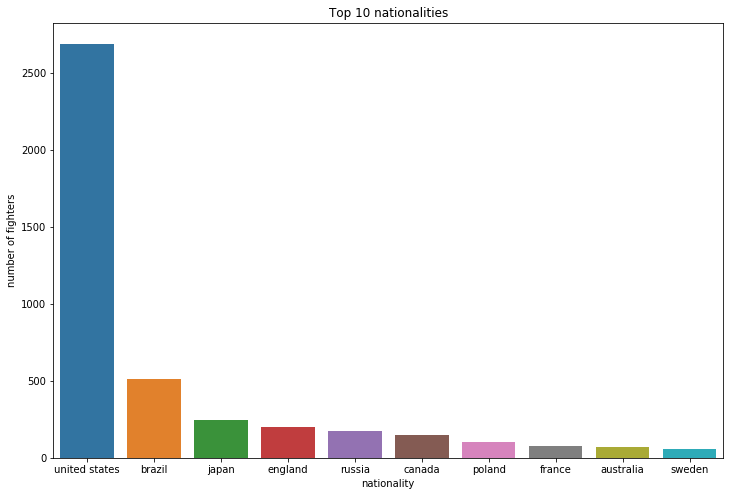

In [38]:
# countplot for top 10 nationalities
plt.figure(figsize=(12,8))
sns.countplot(x='nationality_lower', data=fighter, 
              order=fighter['nationality_lower'].value_counts().iloc[:10].index)
plt.title('Top 10 nationalities')
plt.xlabel('nationality')
plt.ylabel('number of fighters');